In [1]:
# Time series Forecasting with Arima

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot
#подключим нужные библиотеки и читаем данные
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read Data

In [5]:
df = pd.read_csv("trend.csv", parse_dates=['Date'],index_col=['Date'])

In [6]:
df.head()

,Sales
Date,
2023-01-01,30.052513
2023-01-02,19.148496
2023-01-03,25.317692
2023-01-04,27.591437
2023-01-05,32.076456


In [7]:
# Resample Aggregation of sata

In [8]:
ts =df['Sales'].resample('D').sum()
# A = Year end
# M=MonthEnd
# W=Weekly
# D=Daily
# MS=MonthStart

In [9]:
ts.head()

Date
2023-01-01    30.052513
2023-01-02    19.148496
2023-01-03    25.317692
2023-01-04    27.591437
2023-01-05    32.076456
Freq: D, Name: Sales, dtype: float64

<AxesSubplot: xlabel='Date'>

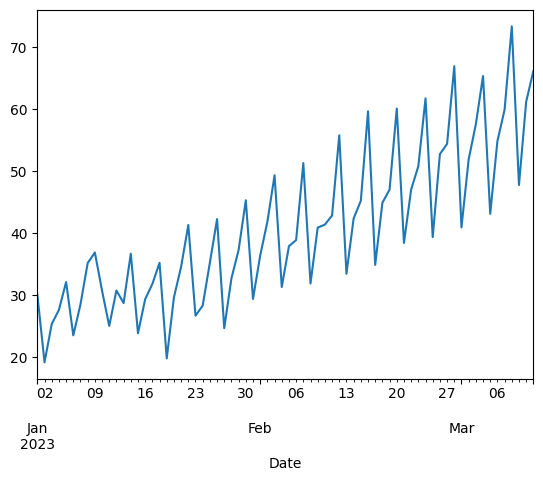

In [10]:
ts.plot()

In [11]:
# 3 Stationarity check

In [12]:
import statsmodels.api as sm

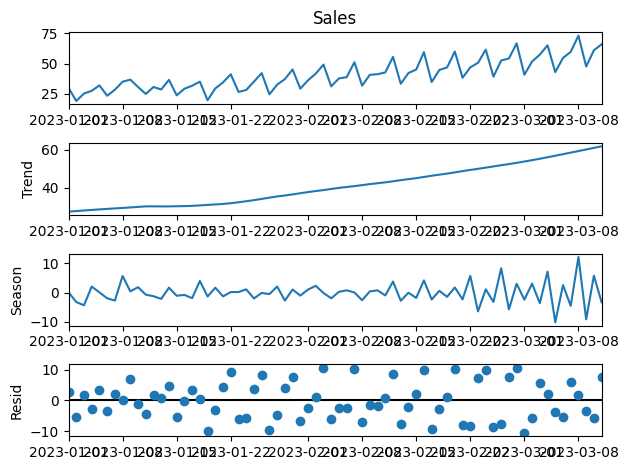

In [13]:
from statsmodels.tsa.seasonal import STL

stl = STL(ts, period=10)
res = stl.fit()
fig = res.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adftest = adfuller(ts)

In [16]:
print('pvalue of adfuller test is:',adftest[1])

pvalue of adfuller test is: 0.996373357705153


In [17]:
# Step 4 Train test split

In [18]:
len(ts)

70

In [19]:
train = ts[:50]
test = ts[50:]

In [20]:
# arima:     AR, MA, Integrated. 

In [21]:
# Step5: Hyperparameters of ARIMA model p,d,q
from statsmodels.tsa.arima.model import ARIMA
# 12 0 6 
#30 2 6 8

#the number of autoregressive
p=2
#degree of differencing
d=1
#the number of moving average terms
q=3
#the number of periods in each season
s=8

In [22]:
# Step6: Build ARIMA model
# model = ARIMA(train,order=(p, d, q)).fit()
model = ARIMA(train,seasonal_order=(p, d, q, s)).fit()

# Step 7 Predict test dataset
pred = model.predict(start=len(train),end=(len(ts)-1))

C:\Users\Xiaomi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
#step8. Model Evaluation
from sklearn.metrics import mean_squared_error
error=np.sqrt(mean_squared_error(test,pred))
error
test.mean(),np.sqrt(test.var())

(54.604546086000006, 9.869656774498727)

<AxesSubplot: xlabel='Date'>

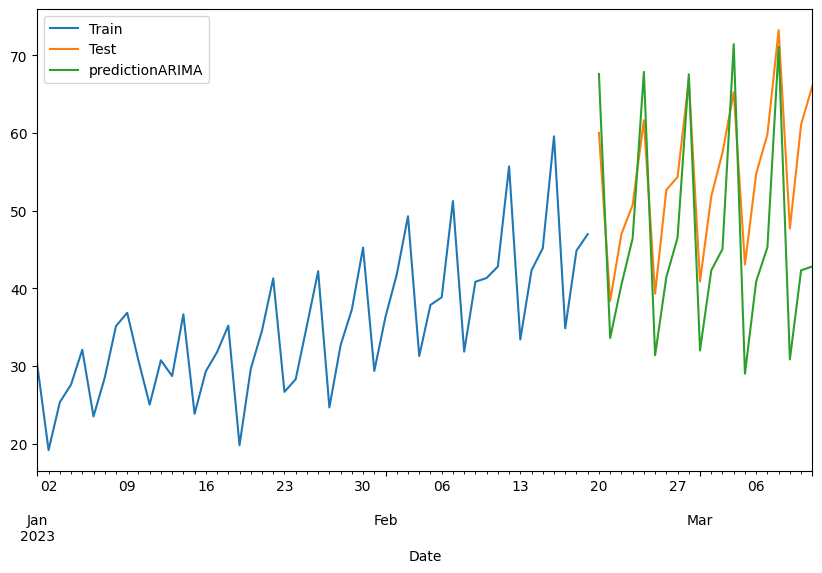

In [24]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
pred.plot(legend=True, label='predictionARIMA')

In [25]:
#Step9 Predict Future Data

In [26]:
final_model = ARIMA(ts,seasonal_order=(p, d, q, s)).fit()#fulldata

C:\Users\Xiaomi\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
prediction = final_model.predict(len(ts),len(ts)+30)

<AxesSubplot: xlabel='Date'>

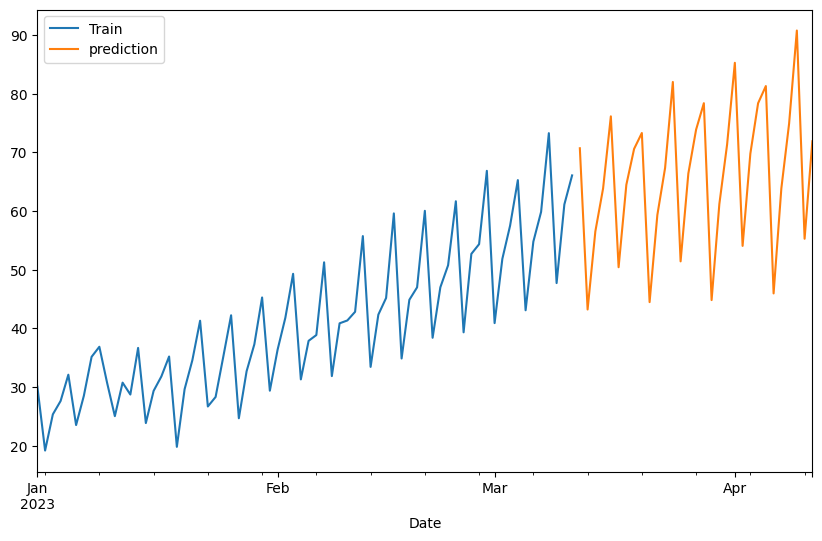

In [28]:
ts.plot(legend = True, label= 'Train', figsize = (10,6))
prediction.plot(legend=True,label='prediction')

In [29]:
import statsmodels.api as sm
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.seasonal import STL


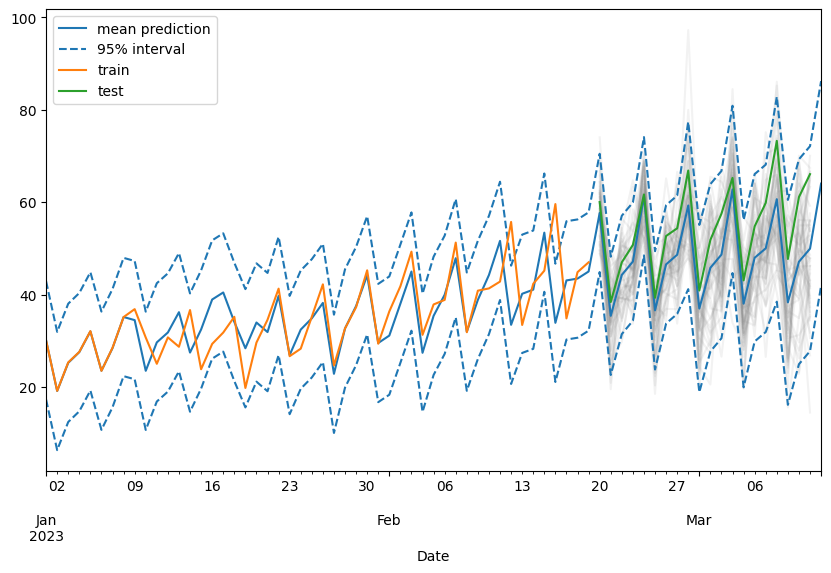

In [30]:
# ETS Test

percentPredict = 40
seasonal_periods = 8
dataframe = train
BorderRow = int(len(dataframe)/100*percentPredict)

model = ETSModel(train, error="add", trend="add", seasonal="add", damped_trend=True, seasonal_periods=seasonal_periods, )
fit = model.fit()


units = len(dataframe)
pred = fit.get_prediction(start=0,end=len(train)+len(test))
df = pred.summary_frame(alpha=0.05)



simulated = fit.simulate(anchor="end", nsimulations=BorderRow, repetitions=50)
for i in range(simulated.shape[1]):
    simulated.iloc[:, i].plot(label="_", color="gray", alpha=0.1)

df["mean"].plot(label="mean prediction")
df["pi_lower"].plot(linestyle="--", color="tab:blue", label="95% interval")
df["pi_upper"].plot(linestyle="--", color="tab:blue", label="_")
# pred.endog.plot(label="data",figsize = (10,6))
train.plot(label="train",figsize = (10,6))
test.plot(label="test",figsize = (10,6))
plt.legend()

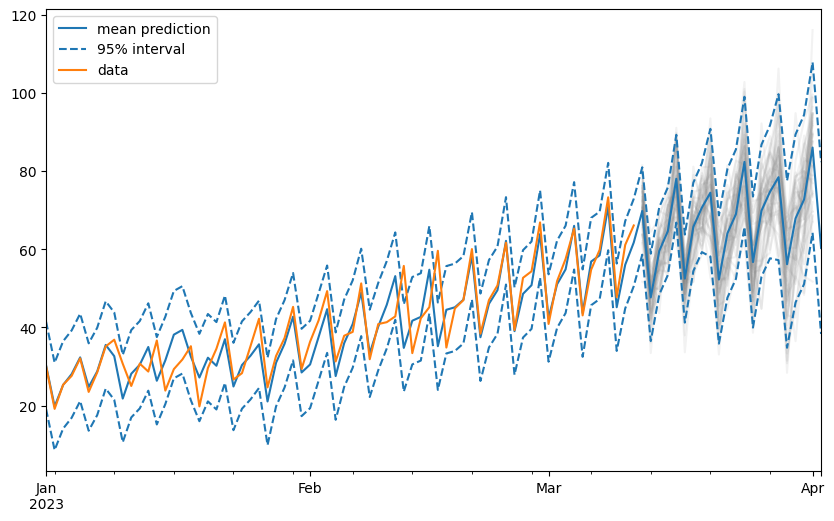

In [31]:
#prediction in ETS
def ETS(dataframe,seasonal_periods, percentPredict = 30):
    BorderRow = int(len(dataframe)/100*percentPredict)

    model = ETSModel(
        dataframe,
        error="add",
        trend="add",
        seasonal="add",
        damped_trend=True,
        seasonal_periods=seasonal_periods,
    )
    fit = model.fit()


    units = len(dataframe)
    # pred = fit.get_prediction(start=5, end=units+200)
    pred = fit.get_prediction(start=0, end=units+BorderRow)
    df = pred.summary_frame(alpha=0.05)



    simulated = fit.simulate(anchor="end", nsimulations=BorderRow, repetitions=50)
    for i in range(simulated.shape[1]):
        simulated.iloc[:, i].plot(label="_", color="gray", alpha=0.1)
    df["mean"].plot(label="mean prediction")
    df["pi_lower"].plot(linestyle="--", color="tab:blue", label="95% interval")
    df["pi_upper"].plot(linestyle="--", color="tab:blue", label="_")
    pred.endog.plot(label="data",figsize = (10,6))
    plt.legend()

ETS(ts, seasonal_periods = 8, percentPredict = 30)